In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
import math
import h5py

def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape:taking transpose
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

# print(X_train_orig.shape)
# print(Y_train_orig.shape)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


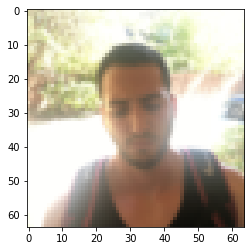

In [4]:
plt.imshow(X_train[20])

In [5]:
Y_train[100]

array([1], dtype=int64)

In [6]:
classes # 0:sad, 1:happy

array([0, 1], dtype=int64)

In [7]:
def HappyModel(input_shape):
    
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(32, (7, 7), strides = 1, name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [8]:
happy_model=HappyModel(X_train.shape[1:])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [41]:
happy_model.compile(optimizer = "adam", loss ='binary_crossentropy', metrics = ["accuracy"])

In [42]:
happy_model.fit(x = X_train , y = Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0632 - accuracy: 0.9783
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0186 - accuracy: 0.9933
Epoch 3/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0264 - accuracy: 0.9900
Epoch 4/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0835 - accuracy: 0.9767
Epoch 5/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0810 - accuracy: 0.9750
Epoch 6/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 7/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0309 - accuracy: 0.9933
Epoch 8/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0142 - accuracy: 0.9950
Epoch 9/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 10/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0795 - accuracy: 0.9817

In [43]:
pred=happy_model.evaluate(x = X_train, y = Y_train)
print("loss= ",pred[0])
print("Train Accuracy ",pred[1])

600/600 [==============================] - 2s 4ms/step
loss=  0.005599442847718213
Train Accuracy  0.9983333349227905


In [44]:
preds = happy_model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 3ms/step
Loss = 0.09389689276615779
Test Accuracy = 0.9599999785423279


In [45]:
predictions = happy_model.predict(X_train)

In [46]:
predictions[0]

array([4.172325e-07], dtype=float32)

In [47]:
happy_model.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0

In [48]:
import cv2

In [49]:
img = cv2.imread('images\\sad.jpg')
img = cv2.resize(img,(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred=happy_model.predict(x)
pred = np.squeeze(pred)
if pred==0:
    print("sad")
else:
    print("happy")

sad


In [50]:
from keras.preprocessing import image

In [51]:
# input static image
face_classifier = cv2.CascadeClassifier(r'C:\Users\Arshit\haarcascades\haarcascade_smile.xml')
colored_img = cv2.imread('images\\sad.jpg')
faces=face_classifier.detectMultiScale(colored_img, scaleFactor=1.5, minNeighbors=15)
for (x,y,w,h) in faces:
    
    img= cv2.rectangle(colored_img, (x,y), (x+w,y+h), (0,255,0),2)
    img = cv2.resize(img,(64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    pred = happy_model.predict(img)
    pred = np.squeeze(pred)
    if pred==0:
        emotion='sad'
        print(emotion)
        cv2.putText(colored_img, emotion, (int(x),int(y)) ,cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
    else:
        emotion='happy'
        print(emotion)
        cv2.putText(colored_img, emotion, (int(x),int(y)) ,cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
    
    
cv2.imshow('img', colored_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

sad


In [52]:
# real time

cap = cv2.VideoCapture(0)
while True:
    ret, colored_img = cap.read()
    faces=face_classifier.detectMultiScale(colored_img, scaleFactor=1.5, minNeighbors=20)
    for x,y,w,h in faces:
        emotion=' '
        img= cv2.rectangle(colored_img, (x,y), (x+w,y+h), (0,255,0),2)
        img = cv2.resize(img,(64,64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        pred = happy_model.predict(img)
        pred = np.squeeze(pred)
        if pred==0:
            emotion='sad'
            cv2.putText(colored_img, emotion, (int(x),int(y)) ,cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        else:
            emotion='happy'
            cv2.putText(colored_img, emotion, (int(x),int(y)) ,cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        
    cv2.imshow('img', colored_img)
    if cv2.waitKey(1)==27:
        break
    
    
    
cap.release()
cv2.destroyAllWindows()